<a href="https://colab.research.google.com/github/Luism96xd/artificial-intelligence-notebooks/blob/main/Regresion-excercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ejemplo 1:** Predecir el precio de una casa según el número de cuartos - Ejercicio de Regresión Lineal

In [1]:
#Importar bibliotecas necesarias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
A = [2, 3, 4, 5, 6, 7]
B = [3, 5, 7, 9 ,12 ,15]

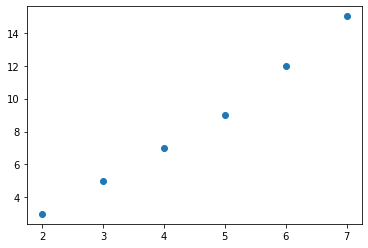

In [3]:
plt.scatter(A, B)
plt.show()

##**Importamos los datos y los inspeccionamos**

In [4]:
from sklearn.datasets import load_boston

In [5]:
#Cargar los datos, obtener los datos.
boston = load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#Describir las característica - Analizar los datos
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

##**Creamos nuestros datos de entrada y salida**
* **boston.data[:, 5]** significa: Quiero todos los registros, de la variable 5 (RM o Número promedio de habitaciones en la vivienda)
* **boston.target** se refiere al precio promedio de la vivienda. (en miles)


In [7]:
_X = np.array(boston.data[:, 5])

Y = np.array(boston.target)

In [8]:
print(np.array(boston.data[:,5]))

[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.375 5.8

Calculamos el promedio de las habitaciones en cada casa

In [ ]:
print(np.mean(_X))

6.284634387351779


In [ ]:
print(np.array(boston.data[:,5].shape))

[506]


In [ ]:
print(Y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

Calculamos el precio promedio entre todas las viviendas

In [ ]:
print(np.mean(Y))

22.532806324110677


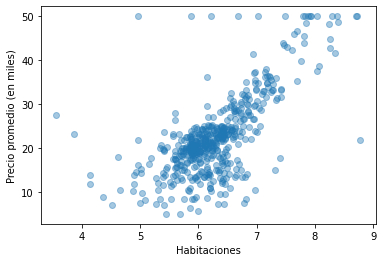

In [10]:
#Graficamos nuestros datos como un conjunto de puntos(cuartos, precio)
plt.scatter(_X,Y, alpha=0.4)
plt.xlabel("Habitaciones")
plt.ylabel("Precio promedio (en miles)")
plt.show()

In [11]:
#Creamos nuestra matriz de datos de entrada, transponiendo y colocando una fila de unos
X = np.array([np.ones(506), _X]).T
print(X.T,"\n")
print(X)
#Cada fila es una medición diferente

[[1.    1.    1.    ... 1.    1.    1.   ]
 [6.575 6.421 7.185 ... 6.976 6.794 6.03 ]] 

[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 ...
 [1.    6.976]
 [1.    6.794]
 [1.    6.03 ]]


Fórmula para calcular el error cuadrático medio: $\beta = (X^{T}X)^{-1}X^TY$


In [12]:
#Obtenemos la matriz de parámetros que mejor se ajusten a los datos 
#(Multiplicación de matrices)}
B = np.linalg.inv(X.T @ X) @ X.T @ Y

print(B)
#Valor del intercepto,

#Valor de la pendiente 9 unidades veces el valor por cada cuarto

[-34.67062078   9.10210898]


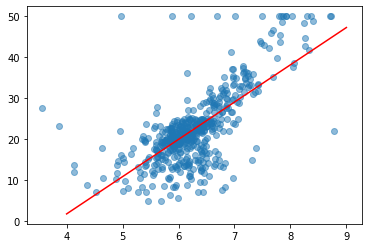

In [13]:
#Graficamos nuestra línea de regresión a partir de los parámetros obtenidos
plt.scatter(_X,Y, alpha=0.5)
plt.plot([4,9], [B[0] + B[1] * 4, B[0] + B[1] * 9], c='red')
plt.show()

## **EJEMPLO N° 2: Calcular el porcentaje de la bateria según el tiempo de carga**

In [14]:
#Importamos bibliotecas
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor

In [ ]:
#Leemos los datos y los separamos como entrada y salida
datos = pd.read_csv("/content/bateria.csv")
datos.head(10)

FileNotFoundError: ignored

In [ ]:
#creamos nuestros datos de entrada"x" y de salida "y"
x = datos["Tiempo"]
y = datos["Carga"]

In [ ]:
#Seleccionamos todos (:) los datos de la columna del tiempo
X = x[:, np.newaxis]
#Imprimimos las dimensiones de nuestros datos
print(X.shape)

In [ ]:
while True:
  #Dividimos los datos en entrenaiento y prueba aleatoriamente
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X,y)

  #Creamos nuestro modelo (optimizador, numero de capas ocultas, etc)
  modelo = MLPRegressor(solver = "lbfgs", alpha= 1e-5, hidden_layer_sizes=(3,3),random_state=1)

  #Entrenamos el modelo
  modelo.fit(X_train, y_train)

  #Realizamos la predicción
  print(modelo.score(X_train,y_train))
  if (modelo.score(X_train,y_train) > 0.95):
    break

In [ ]:
#Hacemos nuestra predicción
prediccion = modelo.predict([[20]])
print("Predicción en T=20:  ", prediccion) #TO-DO: Compare el resultado predecido y el resultado de la tabla de arriba

# **EJEMPLO N° 3**: Calcular la cantidad de CO2 emitido en base al peso del vehículo

In [16]:
raw_dataset = pd.read_csv("/content/cars.csv")

dataset = raw_dataset.copy()
dataset.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [17]:
#Contamos cuantos registros hay en la tabla
dataset.count()

Car       36
Model     36
Volume    36
Weight    36
CO2       36
dtype: int64

In [18]:
#Cuantas marcas de autos únicas existen
dataset['Car'].unique()

array(['Toyoty', 'Mitsubishi', 'Skoda', 'Fiat', 'Mini', 'VW', 'Mercedes',
       'Ford', 'Audi', 'Hyundai', 'Suzuki', 'Honda', 'Hundai', 'Opel',
       'BMW', 'Mazda', 'Volvo'], dtype=object)

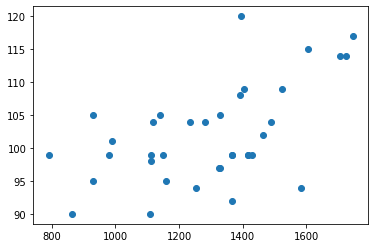

In [19]:
plt.scatter(dataset['Weight'],dataset['CO2'])
x = dataset['Weight']
y = dataset['CO2']

In [20]:
#Desecharemos 2 de las variables, por ser categóricas 
dataset = dataset.drop(['Car','Model'], axis=1)

dataset.tail()

,Volume,Weight,CO2
31,2000,1746,117
32,1600,1235,104
33,1600,1390,108
34,1600,1405,109
35,2500,1395,120


Conoceremos cuantos datos nulos hay en la tabla

In [21]:
dataset.isna().sum()

Volume    0
Weight    0
CO2       0
dtype: int64

Eliminaremos los registros que tengan datos nulos

In [22]:
dataset = dataset.dropna()
dataset.head()

,Volume,Weight,CO2
0,1000,790,99
1,1200,1160,95
2,1000,929,95
3,900,865,90
4,1500,1140,105


In [23]:
#Describiremos la tabla de datos de entrada
train_stats = dataset.describe()
train_stats.pop("CO2")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Volume,36.0,1611.111111,388.975047,900.0,1475.00,1600.0,2000.00,2500.0
Weight,36.0,1292.277778,242.123889,790.0,1117.25,1329.0,1418.25,1746.0


In [24]:
#Visualizamos los datos de salida o respuestas esperadas
train_labels = dataset.pop('CO2')
train_labels

0      99
1      95
2      95
3      90
4     105
5     105
6      90
7      92
8      98
9      99
10     99
11    101
12     99
13     94
14     97
15     97
16     99
17    104
18    104
19    105
20     94
21     99
22     99
23     99
24     99
25    102
26    104
27    114
28    109
29    114
30    115
31    117
32    104
33    108
34    109
35    120
Name: CO2, dtype: int64

##**Normalizamos los datos**
La normalización ayuda a comparar cantidades con diferentes escala y reduce la complejidad de los cálculos.

In [25]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(dataset)
normed_train_data

,Volume,Weight
0,-1.571080,-2.074466
1,-1.056909,-0.546323
2,-1.571080,-1.500380
3,-1.828166,-1.764707
4,-0.285651,-0.628925
5,-1.571080,-1.500380
6,-0.542737,-0.756959
7,-0.285651,0.300351
8,-0.285651,-0.744568
9,-0.028565,-0.587624


In [ ]:
#Observamos cuantos atributos hay en la tabla de datos
len(dataset.keys())

##**Construimos el modelo**
Una red neuronal de 3 capas, una capa de 64 neuronas, otra capa de 64 neuronas y una capa de salida, con una (1) neurona (ya que es un problema de regresión)

In [27]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(0.01)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [28]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


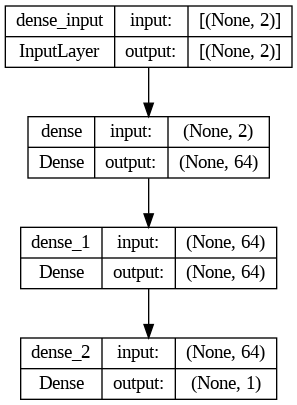

In [30]:
img_file = './model_arch.png'

tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

In [31]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 344ms/step


array([[ 0.10604727],
       [-0.03688328],
       [ 0.03583606],
       [ 0.044882  ],
       [ 0.04856852],
       [ 0.03583606],
       [ 0.04174936],
       [-0.03385767],
       [ 0.05935096],
       [ 0.04546402]], dtype=float32)

##**Entrenamos el modelo**

In [32]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [33]:
#OBSERVAMOS CADA UNA DE LAS MÉTRICAS EN UNA TABLA
#Error, error absoluto medio, error cuadrático medio, 
#tanto en el entrenamiento como en la validación y el número de épocas
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,13.319278,2.821359,13.319278,63.249825,6.891799,63.249825,495
496,13.317352,2.820853,13.317352,63.229958,6.888515,63.229958,496
497,13.315912,2.820373,13.315912,63.208237,6.885614,63.208237,497
498,13.313394,2.820046,13.313394,63.180489,6.882016,63.180489,498
499,13.312218,2.819745,13.312218,63.162315,6.879961,63.162315,499


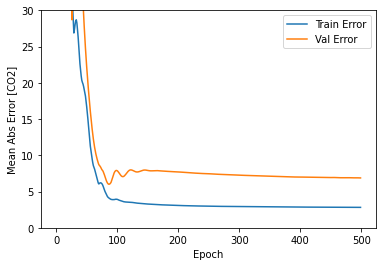

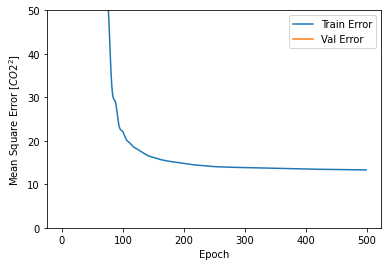

In [34]:
#Graficamos el proceso de entrenamiento
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [CO2]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,30])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$CO2^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,50])
  plt.legend()
  plt.show()


plot_history(history)


##**Evaluamos el entrenamiento con los datos de prueba (Test)**

In [35]:
loss, mae, mse = model.evaluate(normed_train_data, train_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} CO2".format(mae))

2/2 - 0s - loss: 24.3884 - mae: 3.7220 - mse: 24.3884 - 23ms/epoch - 11ms/step
Testing set Mean Abs Error:  3.72 CO2


2/2 [==============================] - 0s 5ms/step


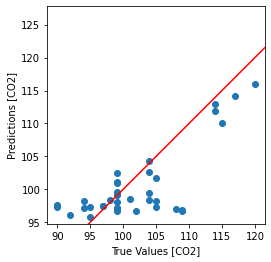

In [36]:
test_predictions = model.predict(normed_train_data).flatten()

plt.scatter(train_labels, test_predictions)
plt.xlabel('True Values [CO2]')
plt.ylabel('Predictions [CO2]')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-1000, 1000], [-1000, 1000], c="red")


##**Realizamos predicciones**

In [40]:
# x = [Peso, Volumen]

weight = 1000
volume = 200

prediccion = model.predict([ [weight, volume] ])
print(prediccion)
print()
print(f"Si un vehículo tiene un peso de {weight} y un volumen de {volume}.\nEntoces, el vehículo emitirá "+str(prediccion[0][0])+" toneladas de CO2") 
print(prediccion)

1/1 [==============================] - 0s 38ms/step
[[22277.004]]

Si un vehículo tiene un peso de 1000 y un volumen de 200.
Entoces, el vehículo emitirá 22277.004 toneladas de CO2
[[22277.004]]
